In [53]:
import pysal as ps
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import datetime
import prettyplotlib as ppl

from scipy import stats
import statsmodels.api as sm

import watermark


pd.set_option("max_columns", None)

sns.set_style('whitegrid')

%matplotlib inline

%config InlineBackend.figure_format = 'retina'

%watermark -v -d -a 'Mario Javier Carrillo' -p matplotlib,numpy,pandas

%load_ext watermark
%watermark -v -d -a 'Mario Javier Carrillo' -p matplotlib,numpy,pandas




Mario Javier Carrillo 2018-01-28 

CPython 3.6.3
IPython 6.1.0

matplotlib 2.1.0
numpy 1.13.3
pandas 0.20.3
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Mario Javier Carrillo 2018-01-28 

CPython 3.6.3
IPython 6.1.0

matplotlib 2.1.0
numpy 1.13.3
pandas 0.20.3


## Loading data to pandas df

In [5]:
df = pd.read_csv('/home/java/Desktop/HORIZON2020/DATASETS/NATURE_CRIME/Type_crime.csv')
df.head



<bound method NDFrame.head of             STATE/UT  YEAR         Place Of Occurrence  \
0     Andhra Pradesh  2001        RESIDENTIAL PREMISES   
1     Andhra Pradesh  2001                    HIGH-WAY   
2     Andhra Pradesh  2001                 RIVER & SEA   
3     Andhra Pradesh  2001                    RAILWAYS   
4     Andhra Pradesh  2001              RUNNING TRAINS   
5     Andhra Pradesh  2001                 OTHERS RLY.   
6     Andhra Pradesh  2001                       BANKS   
7     Andhra Pradesh  2001   COMMERCIAL ESTABLISHMENTS   
8     Andhra Pradesh  2001                OTHER PLACES   
9     Andhra Pradesh  2001              TOTAL (MANUAL)   
10    Andhra Pradesh  2001  TOTAL COMPUTER FROM 1 TO 7   
11    Andhra Pradesh  2002        RESIDENTIAL PREMISES   
12    Andhra Pradesh  2002                    HIGH-WAY   
13    Andhra Pradesh  2002                 RIVER & SEA   
14    Andhra Pradesh  2002                    RAILWAYS   
15    Andhra Pradesh  2002              RU

## Data Cleaning

In [8]:
df.rename(columns={'STATE/UT':'STATE_UT','Place Of Occurrence':'PLACE_OCCURENCE',
'Dacoity (Section 395-398 IPC) - Number of cases registered':'DACOITY_NUM',
    'Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees)':'VALUE_DACOITY',
    'Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered':'ROBBERY_NO',
    'Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)':'ROBBERY_VALUE',
    'Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered':'BURGLARY_NO',
     'Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)':'BURGLARY_VALUE',
    'Theft (Section 379-382 IPC) - Number of cases registered':'THEFT_NO',
   'Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)':'THEFT_VALUE'},inplace=True)
#print(df)

df.columns




Index(['STATE_UT', 'YEAR', 'PLACE_OCCURENCE', 'DACOITY_NUM', 'VALUE_DACOITY',
       'ROBBERY_NO', 'ROBBERY_VALUE', 'BURGLARY_NO', 'BURGLARY_VALUE',
       'THEFT_NO', 'THEFT_VALUE'],
      dtype='object')

In [9]:
df['STATE_UT'] = df.STATE_UT.str.replace('\s+&\s+', '&')

df


,STATE_UT,YEAR,PLACE_OCCURENCE,DACOITY_NUM,VALUE_DACOITY,ROBBERY_NO,ROBBERY_VALUE,BURGLARY_NO,BURGLARY_VALUE,THEFT_NO,THEFT_VALUE
0,Andhra Pradesh,2001,RESIDENTIAL PREMISES,100,4446961,177,5962460,5158,105324332,4257,53517835
1,Andhra Pradesh,2001,HIGH-WAY,57,5340335,172,6364866,31,2000574,74,1593092
2,Andhra Pradesh,2001,RIVER & SEA,2,145345,11,209330,101,1412516,110,1610200
3,Andhra Pradesh,2001,RAILWAYS,8,1750800,19,304336,6,24392,943,16418110
4,Andhra Pradesh,2001,RUNNING TRAINS,5,75000,3,164000,0,0,296,6170175
5,Andhra Pradesh,2001,OTHERS RLY.,3,1675800,16,140336,6,24392,647,10247935
6,Andhra Pradesh,2001,BANKS,0,0,2,151200,21,3300,16,637735
7,Andhra Pradesh,2001,COMMERCIAL ESTABLISHMENTS,10,11300237,16,816006,1041,26920123,2502,20121181
8,Andhra Pradesh,2001,OTHER PLACES,37,6144020,232,9064079,862,11334111,8849,130206356
9,Andhra Pradesh,2001,TOTAL (MANUAL),214,29127698,629,22872277,7220,147019348,16751,224104509


## Prediction using ARIMA

                             ARIMA Model Results                              
Dep. Variable:     D.number_incidents   No. Observations:                   11
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -119.555
Method:                       css-mle   S.D. of innovations          12448.457
Date:                Sun, 28 Jan 2018   AIC                            251.109
Time:                        20:41:26   BIC                            253.496
Sample:                    01-01-2002   HQIC                           249.604
                         - 01-01-2012                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     8161.5081   3357.080      2.431      0.051    1581.752    1.47e+04
ar.L1.D.number_incidents    -0.1990      0.340     -0.585      0.580      -0.865       0.

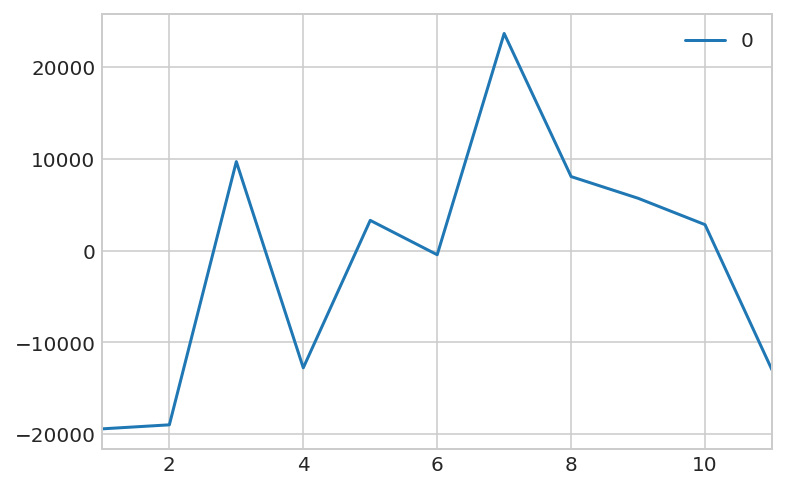

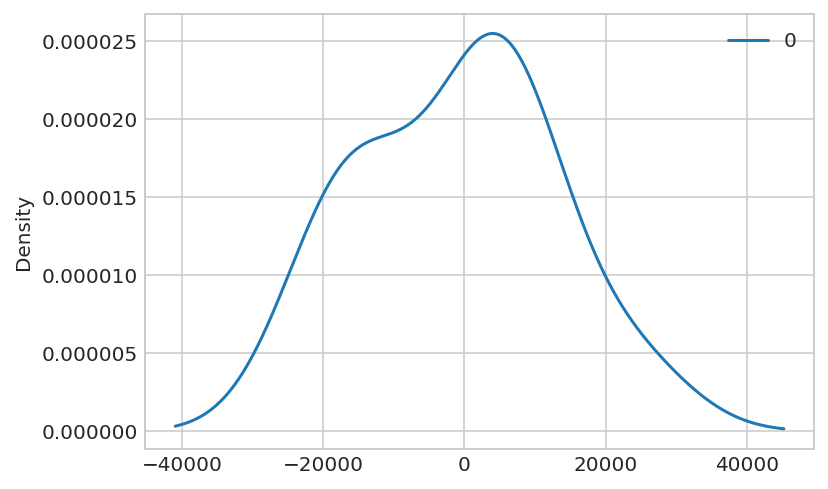

                  0
count     11.000000
mean   -1018.111162
std    13528.356766
min   -19413.508124
25%   -12874.943481
50%     2845.019307
75%     6905.444351
max    23688.138299
##############################################################
1     8161.508124
2    11068.275948
3    18707.228575
4     9488.783015
5     -123.542672
dtype: float64
##############################################################
1     8161.508124
2    19229.784072
3    37937.012647
4    47425.795662
5    47302.252990
dtype: float64
Actual Value
0     380040
1     368788
2     360879
3     389304
4     386033
5     389223
6     399976
7     435555
8     443260
9     448242
10    462289
11    461956
Name: number_incidents, dtype: int64
predicted value
0         NaN
1     8161.51
2     19229.8
3       37937
4     47425.8
5     47302.3
6     58489.2
7       70380
8     69997.4
9     69256.1
10    80458.1
11    93115.2
dtype: object
         YEAR  number_incidents
0  2001-01-01            380040
1  2002-01-01   

/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:65: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in exp


Text(0.5,1,'RMSE: nan')

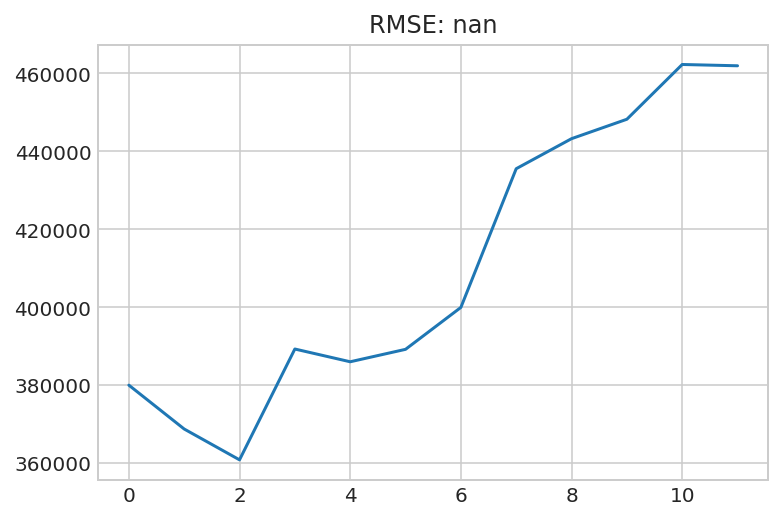

In [13]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot


subset_frame =  df[['YEAR','PLACE_OCCURENCE','DACOITY_NUM', 'ROBBERY_NO', 'BURGLARY_NO','THEFT_NO']]
df_total_num=subset_frame[subset_frame['PLACE_OCCURENCE']=='TOTAL (MANUAL)'].groupby('YEAR')[['DACOITY_NUM', 'ROBBERY_NO', 'BURGLARY_NO','THEFT_NO']].agg('sum').reset_index()
    #print(df_none.head)
    
df_total_num['number_incidents']= df_total_num.iloc[:, 1:5].sum(axis=1)
df_arima=df_total_num[['YEAR','number_incidents']]



#df_arima.columns = ['','']
#df_arima['YEAR'] = pd.to_datetime(df_arima['YEAR'],format="%Y")
#df_arima.set_index('YEAR')

#df_arima['YEAR'] = pd.to_datetime(df_arima['YEAR'],format="%Y")


#df_arima.to_csv('arimadata.csv', sep=',',index=0)


df_arima = pd.read_csv('arimadata.csv')#, parse_dates=[0], index_col=0, squeeze=True, date_parser=dateparse)
df_arima['YEAR']=df_arima.YEAR.astype(str)
df_arima['number_incidents']=df_arima.number_incidents.astype(float)
#print(df_arima)
#print(type(df_arima))

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
df_arima = pd.read_csv('arimadata.csv',parse_dates=[0],date_parser=dateparse)

df_correlation=df_arima



model = ARIMA(df_arima['number_incidents'].astype(float),order=(4,1,0), dates=df_arima['YEAR'])
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
#Line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.
residuals.plot()
pyplot.show()
#Density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print("##############################################################")
print (predictions_ARIMA_diff.head())

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print("##############################################################")
print (predictions_ARIMA_diff_cumsum.head())

ts = df_correlation['number_incidents']

predictions_ARIMA_log = pd.Series(df_arima.ix[0], index=df_arima.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

print("Actual Value")

print(ts)

print("predicted value")
print(predictions_ARIMA_log)

print(df_arima)

predictions_ARIMA = np.exp(predictions_ARIMA_log.astype(float))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_log+ts)**2)/len(ts)))



## autocorrelation for a large number of lags in the time series.

/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  import sys


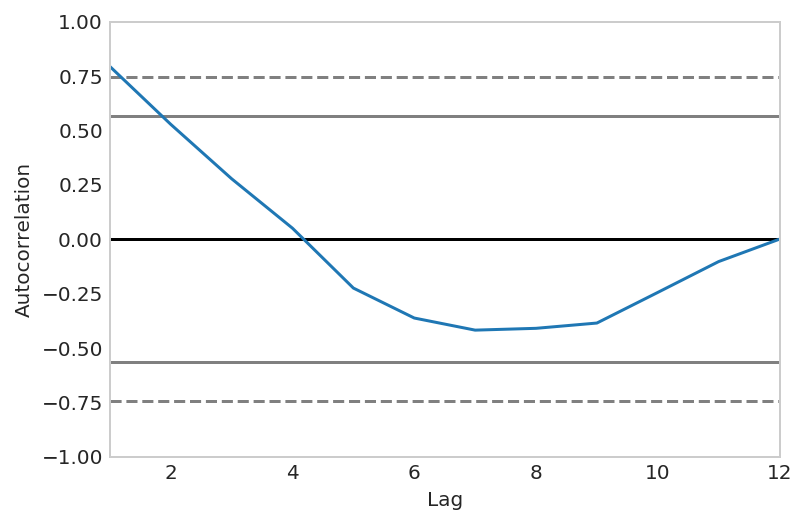

In [17]:
df_arima = pd.read_csv('arimadata.csv')#, parse_dates=[0], index_col=0, squeeze=True, date_parser=dateparse)
df_arima['YEAR']=df_arima.YEAR.astype(int)
df_arima['number_incidents']=df_arima.number_incidents.astype(float)

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
df_arima = pd.read_csv('arimadata.csv',parse_dates=[0],header=0, index_col=0, squeeze=True, date_parser=dateparse)
autocorrelation_plot(df_arima)
pyplot.show()


## How to Check Stationarity of a Time Series


RangeIndex(start=0, stop=12, step=1)
int64


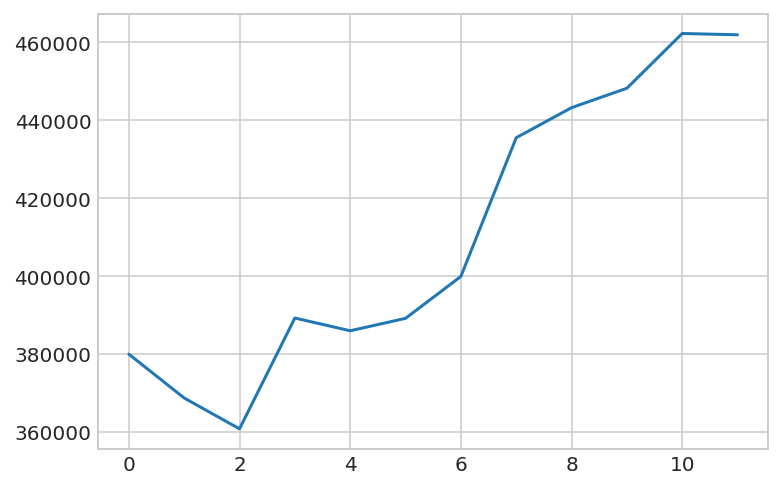

In [20]:
print(df_correlation.index)

ts = df_correlation['number_incidents']
from datetime import datetime
ts[0:13]

print(ts.dtypes)
plt.plot(ts)

## Test Stationariety

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

RangeIndex(start=0, stop=12, step=1)
0     380040
1     368788
2     360879
3     389304
4     386033
5     389223
6     399976
7     435555
8     443260
9     448242
10    462289
11    461956
Name: number_incidents, dtype: int64
int64


/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


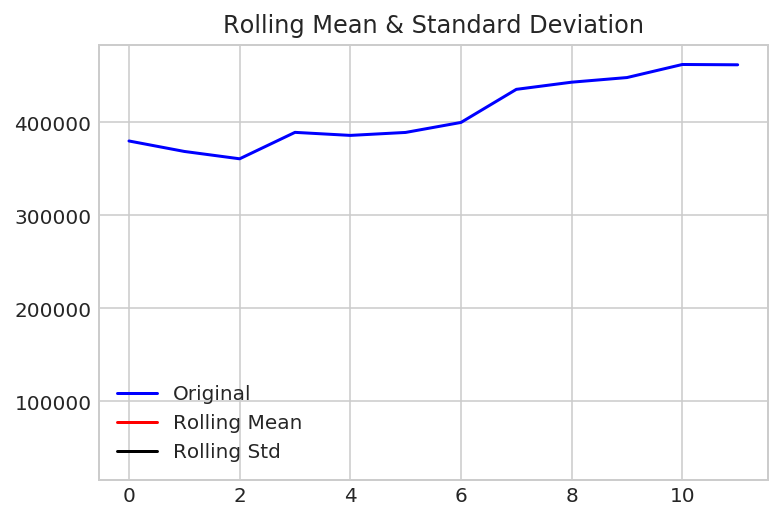

Results of Dickey-Fuller Test:
Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


/home/java/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [25]:
print(df_correlation.index)

ts = df_correlation['number_incidents']
print(ts)
from datetime import datetime
ts[0:13]

print(ts.dtypes)
test_stationarity(ts)

## Estimating and eliminating trend

ts_log = np.log(ts)
plt.plot(ts_log)

##In this simpler case, it is easy to see a forward trend in the data. 
#But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series.

## Aggregation – taking average for a time period like monthly/weekly averages,Smoothing – taking rolling averages,Polynomial Fitting – fit a regression model


/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  """Entry point for launching an IPython kernel.


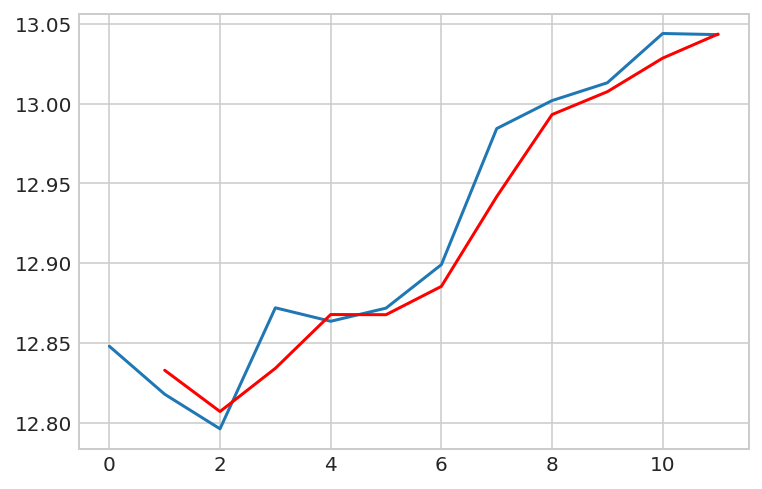

In [33]:
moving_avg = pd.rolling_mean(ts_log,2)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [35]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(2)


0         NaN
1   -0.015027
Name: number_incidents, dtype: float64

/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


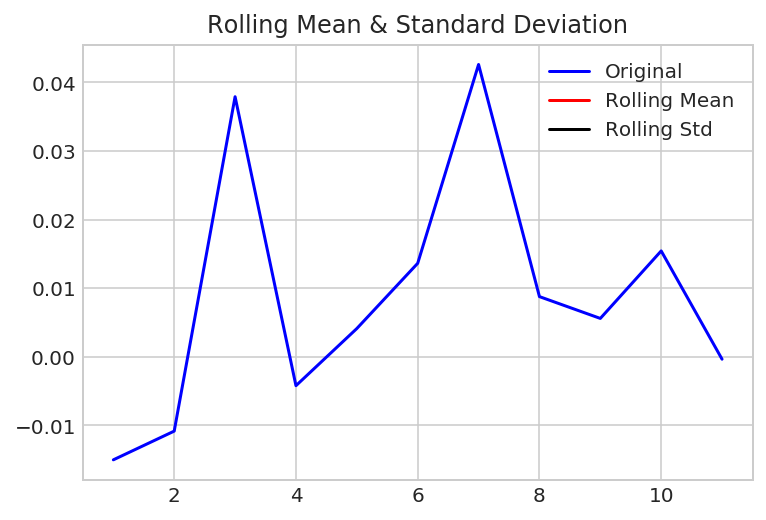

Results of Dickey-Fuller Test:
Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


/home/java/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [37]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=2,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


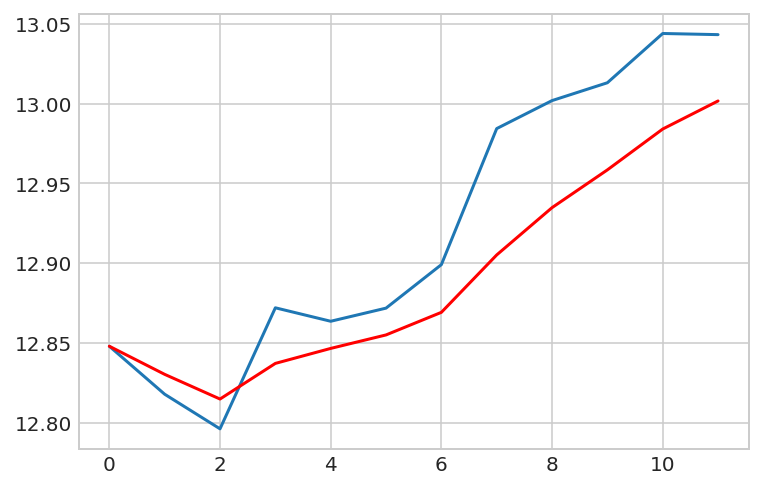

In [39]:
expwighted_avg = pd.ewma(ts_log, halflife=2)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


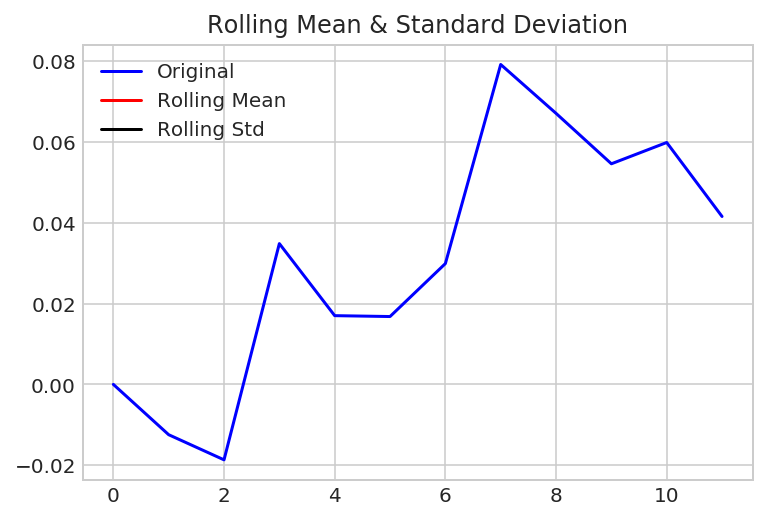

Results of Dickey-Fuller Test:
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


/home/java/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [41]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## AR Model

    YEAR  DACOITY_NUM  ROBBERY_NO  BURGLARY_NO  THEFT_NO
0   2001         6154       19901       101182    252803
1   2002         6101       18764        96461    247462
2   2003         5303       17512        92827    245237
3   2004         5311       18458        92490    273045
4   2005         5141       17673        90108    273111
5   2006         4747       18456        91666    274354
6   2007         4579       19136        91218    285043
7   2008         4530       20522        93742    316761
8   2009         4586       22409        92070    324195
9   2010         4358       23393        90179    330312
10  2011         4285       24700        92504    340800
11  2012         4314       27343        92892    337407


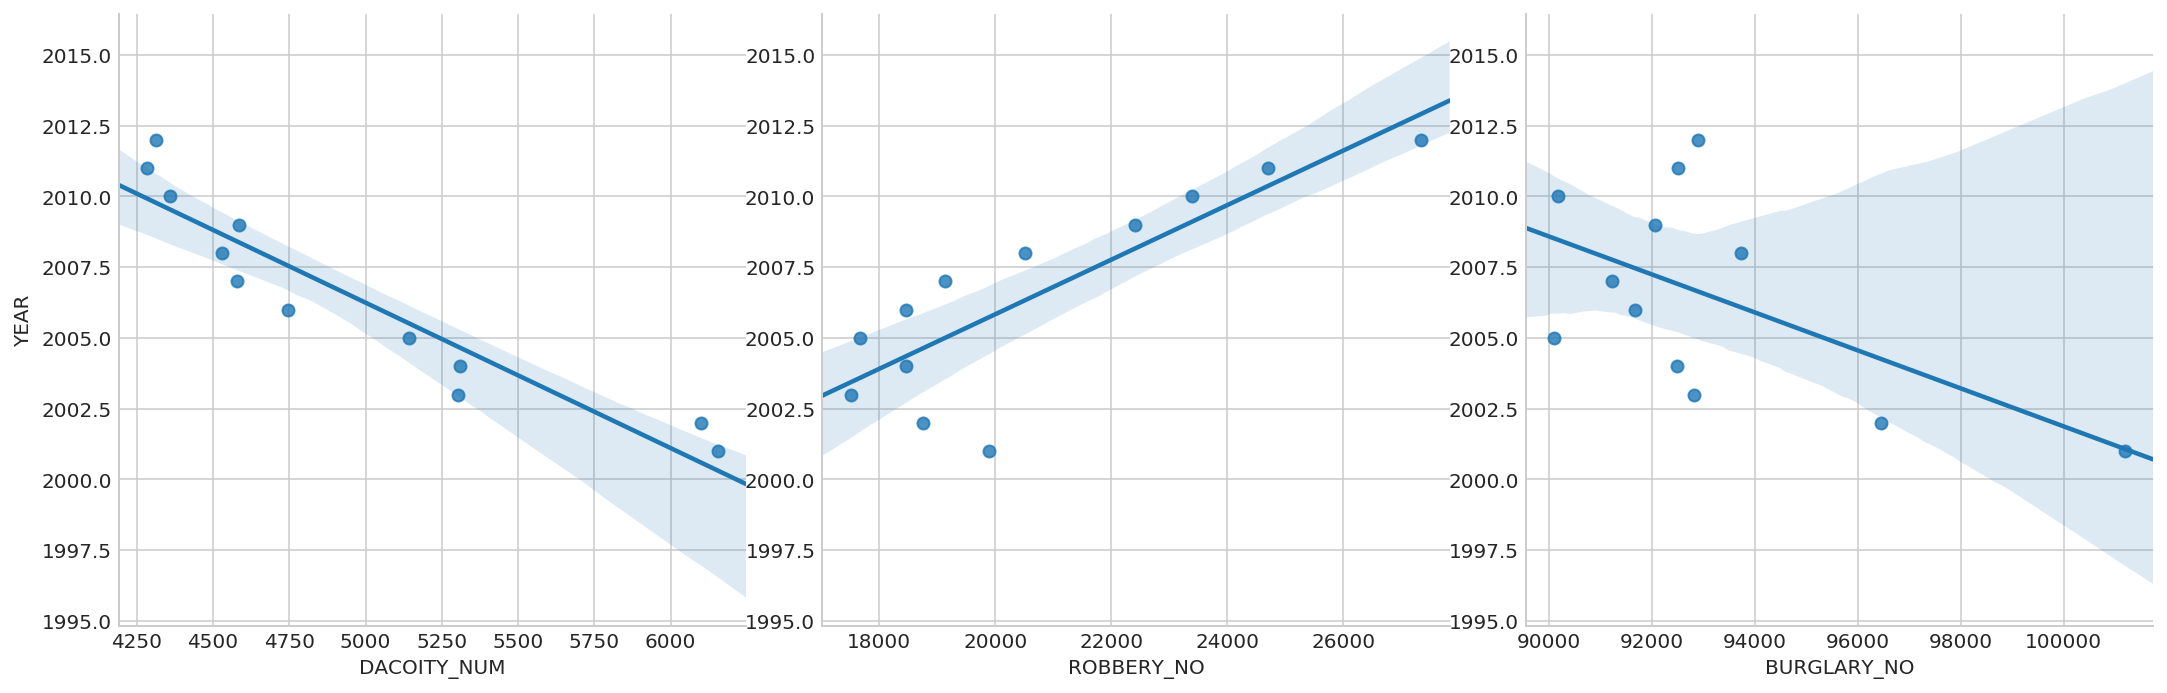

In [45]:
import seaborn as sns

df_linear=df_total_num.drop('number_incidents',axis=1)
df_linear.columns
print(df_linear)

sns.pairplot(df_linear,x_vars=['DACOITY_NUM','ROBBERY_NO','BURGLARY_NO'],y_vars=['YEAR'],kind='reg',size=5)


In [47]:
feature_cols=df_linear[['DACOITY_NUM','ROBBERY_NO','BURGLARY_NO','THEFT_NO']]

X=feature_cols

X

y=df_linear['YEAR']

print(type(y))

<class 'pandas.core.series.Series'>


## Create the model using test and train data

In [51]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [52]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()

linearReg.fit(X_train,y_train)

print(linearReg.intercept_)
print(linearReg.coef_)

print(df_linear.columns,linearReg.coef_)

2014.95551982
[ -1.82209757e-03   2.87312642e-04  -1.74229347e-04   3.71629567e-05]
Index(['YEAR', 'DACOITY_NUM', 'ROBBERY_NO', 'BURGLARY_NO', 'THEFT_NO'], dtype='object') [ -1.82209757e-03   2.87312642e-04  -1.74229347e-04   3.71629567e-05]
